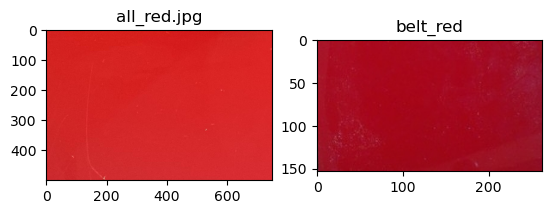

In [80]:
import cv2 as cv
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt

img_path = 'all_red.jpg'
red = cv.imread('../img/'+img_path)
test = cv.imread('/home/aj/robosys24/BlueberryJam/img/small_red.jpg')
red_hsv = cv.cvtColor(red, cv.COLOR_BGR2LAB)
test_hsv = cv.cvtColor(test, cv.COLOR_BGR2LAB)

plt.figure()
plt.subplot(1, 2, 1)
plt.title(img_path)
plt.imshow(cv.cvtColor(red, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('belt_red')
plt.imshow(cv.cvtColor(test, cv.COLOR_BGR2RGB))

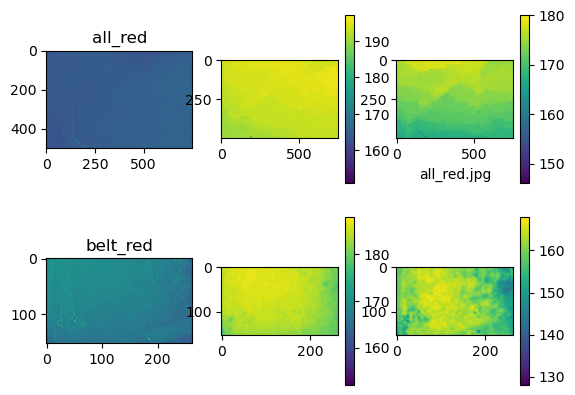

[119.73626933333334, 193.476352, 173.03429066666666]
[87.03620865329655, 184.00382713288104, 160.22617361266433]
0.7268992857209939
0.9510403996705553
0.9259793130907451


In [81]:
norm = colors.Normalize(vmin=-1.,vmax=1.)

red_colors = red_hsv.reshape((np.shape(red_hsv)[0]*np.shape(red_hsv)[1], 3))
test_colors = test_hsv.reshape((np.shape(test_hsv)[0]*np.shape(test_hsv)[1], 3))
norm.autoscale(red_colors)
norm.autoscale(test_colors)
red_colors = norm(red_colors).tolist()
test_colors = norm(test_colors).tolist()
r, e, d = cv.split(red_hsv)
h, s, v = cv.split(test_hsv)
# r = cv.normalize(r,None,0,255,cv.NORM_MINMAX)
# h = cv.normalize(r,None,0,255,cv.NORM_MINMAX)

plt.figure()
plt.subplot(2, 3, 1)
plt.title('all_red')
plt.imshow(r)
plt.subplot(2, 3, 2)
plt.imshow(e)
plt.colorbar()
plt.subplot(2, 3, 3)
plt.imshow(d)
plt.xlabel(img_path)
plt.colorbar()
plt.subplot(2, 3, 4)
plt.title('belt_red')
plt.imshow(h)
plt.subplot(2, 3, 5)
plt.imshow(s)
plt.colorbar()
plt.subplot(2, 3, 6)
plt.imshow(v)
plt.colorbar()
plt.show()

histSize = 256
histRange = (0, 255)
Rcounts = np.histogram(r.flatten(), bins=histSize, range=histRange)
Ecounts = np.histogram(e.flatten(), bins=histSize, range=histRange)
Dcounts = np.histogram(d.flatten(), bins=histSize, range=histRange)
Hcounts = np.histogram(h.flatten(), bins=histSize, range=histRange)
Scounts = np.histogram(s.flatten(), bins=histSize, range=histRange)
Vcounts = np.histogram(v.flatten(), bins=histSize, range=histRange)

Rvalues = Rcounts[0].tolist()
Evalues = Ecounts[0].tolist()
Dvalues = Dcounts[0].tolist()

Ravg = np.mean(r)
Eavg = np.mean(e)
Davg = np.mean(d)

Hvalues = Hcounts[0].tolist()
Svalues = Scounts[0].tolist()
Vvalues = Vcounts[0].tolist()

Havg = np.mean(h)
Savg = np.mean(s)
Vavg = np.mean(v)

print([Ravg,Eavg,Davg])
print([Havg,Savg,Vavg])
Hfrac = Havg/Ravg
Sfrac = Savg/Eavg
Vfrac = Vavg/Davg
print(Hfrac)
print(Sfrac)
print(Vfrac)


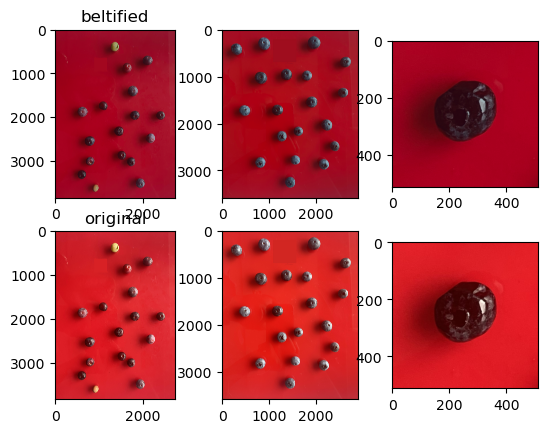

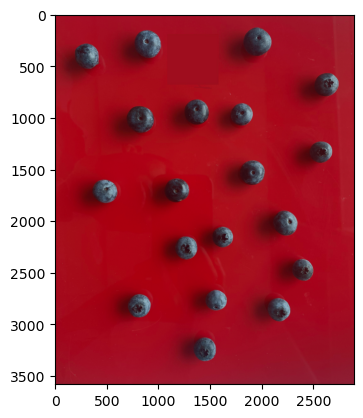

In [83]:
unripe = cv.imread('/home/aj/robosys24/BlueberryJam/img/test_set/unripe/UR_02.jpg')
ripe = cv.imread('/home/aj/robosys24/BlueberryJam/img/test_set/ripe/R_02.jpg')
overripe = cv.imread('/home/aj/robosys24/BlueberryJam/img/test_set/overripe/OR_01.01.jpg')

uhsv = cv.cvtColor(unripe, cv.COLOR_BGR2LAB)
rhsv = cv.cvtColor(ripe, cv.COLOR_BGR2LAB)
ohsv = cv.cvtColor(overripe, cv.COLOR_BGR2LAB)

uh, us, uv = cv.split(uhsv)
rh, rs, rv = cv.split(rhsv)
oh, os, ov = cv.split(ohsv)

def convert_matlike(channel, frac):
    return np.clip(channel*frac,0,255)

suh = convert_matlike(uh, Hfrac)
suh = cv.convertScaleAbs(suh)
sus = convert_matlike(us, Sfrac)
sus = cv.convertScaleAbs(sus)
suv = convert_matlike(uv, Vfrac)
suv = cv.convertScaleAbs(suv)
suhsv = cv.merge((suh,sus,suv))
suhsv = cv.cvtColor(suhsv, cv.COLOR_LAB2RGB)


srh = convert_matlike(rh, Hfrac)
srh = cv.convertScaleAbs(srh)
srs = convert_matlike(rs, Sfrac)
srs = cv.convertScaleAbs(srs)
srv = convert_matlike(rv, Vfrac)
srv = cv.convertScaleAbs(srv)
srhsv = cv.merge((srh,srs,srv))
srhsv = cv.cvtColor(srhsv, cv.COLOR_LAB2RGB)


soh = convert_matlike(oh, Hfrac)
soh = cv.convertScaleAbs(soh)
sos = convert_matlike(os, Sfrac)
sos = cv.convertScaleAbs(sos)
sov = convert_matlike(ov, Vfrac)
sov = cv.convertScaleAbs(sov)
sohsv = cv.merge((soh,sos,sov))
sohsv = cv.cvtColor(sohsv, cv.COLOR_LAB2RGB)

plt.figure()
plt.subplot(2,3,1)
plt.title('beltified')
plt.imshow(suhsv)
plt.subplot(2,3,4)
plt.title('original')
plt.imshow(cv.cvtColor(unripe, cv.COLOR_BGR2RGB))
plt.subplot(2,3,2)
plt.imshow(srhsv)
plt.subplot(2,3,5)
plt.imshow(cv.cvtColor(ripe, cv.COLOR_BGR2RGB))
plt.subplot(2,3,3)
plt.imshow(sohsv)
plt.subplot(2,3,6)
plt.imshow(cv.cvtColor(overripe, cv.COLOR_BGR2RGB))

plt.figure()
plt.imshow(srhsv)